# CDFS SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "_20170718"

master_catalogue = Table.read("{}/master_catalogue_cdfs-swire_{}.fits".format(OUT_DIR, SUFFIX))
print('Using masterlist ' + "{}/master_catalogue_cdfs-swire_{}.fits".format(OUT_DIR, SUFFIX))

Using masterlist ./data/master_catalogue_cdfs-swire_20180126.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(380, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(380, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

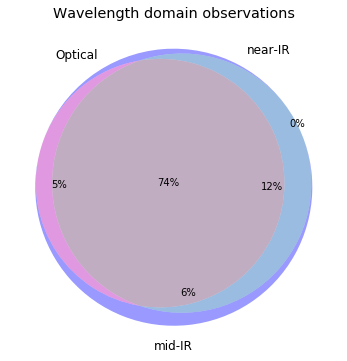

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

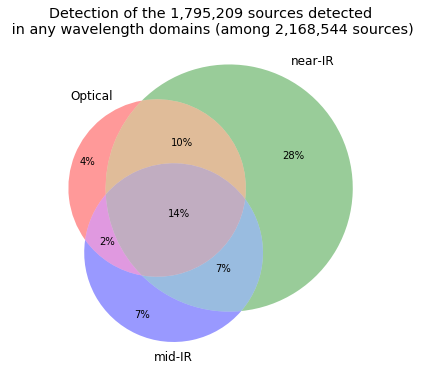

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["OmegaCAM u", "WFI u"]
g_bands = ["OmegaCAM g",          "GPC1 g", "DECam g"]
r_bands = ["OmegaCAM r", "WFI r", "GPC1 r", "DECam r"]
i_bands = ["OmegaCAM i", "WFI i", "GPC1 i", "DECam i"]
z_bands = ["OmegaCAM z",          "GPC1 z", "DECam z", "VISTA z"]
y_bands = [                       "GPC1 y", "DECam y", "VISTA y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

HELP warning: the column m_wfi_u (WFI u) is empty.


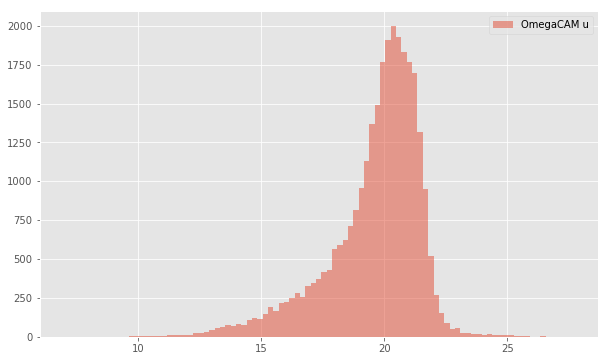

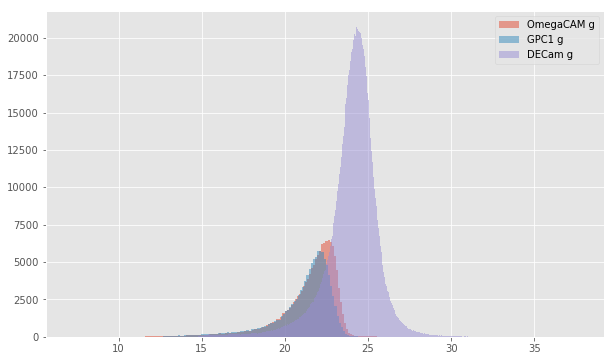

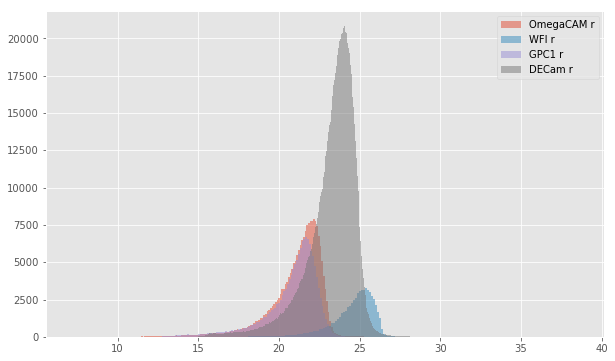

HELP warning: the column m_wfi_i (WFI i) is empty.


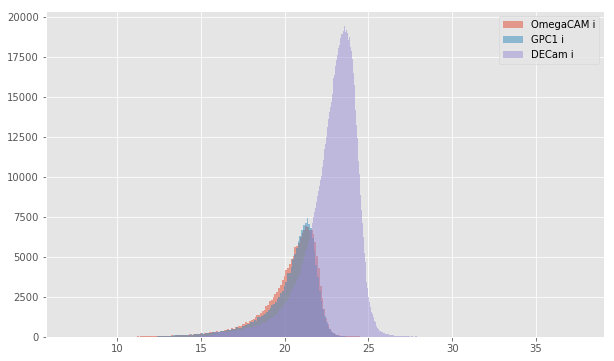

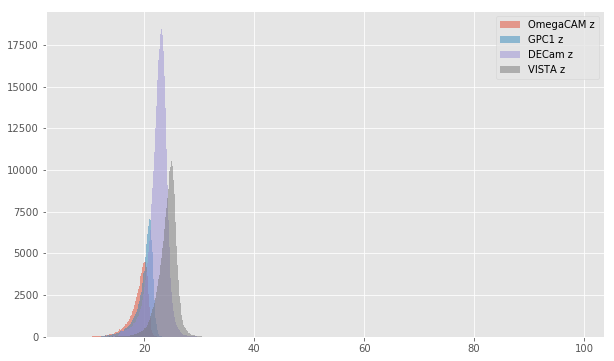

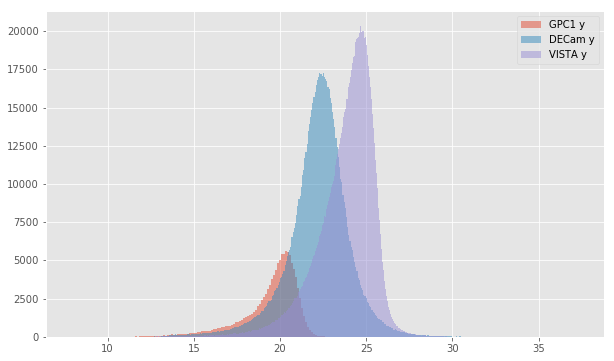

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

WFI u (aperture) - OmegaCAM u (aperture):
- Median: 0.30
- Median Absolute Deviation: 0.07
- 1% percentile: 0.026031494140625
- 99% percentile: 5.898116226196289


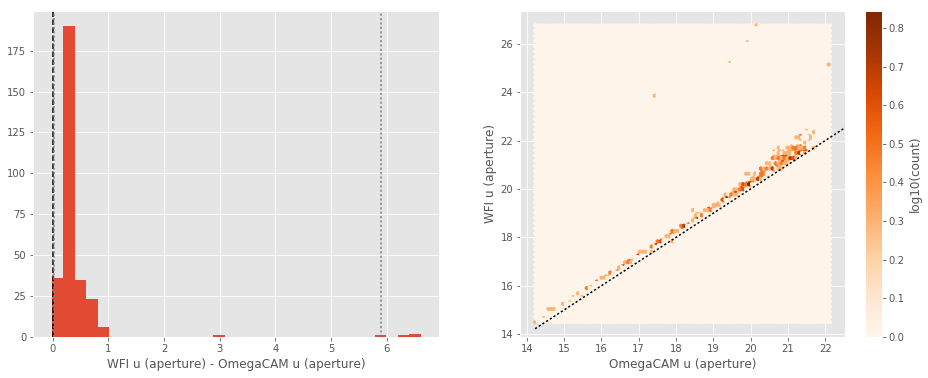

No sources have both OmegaCAM u (total) and WFI u (total) values.
GPC1 g (aperture) - OmegaCAM g (aperture):
- Median: -0.30
- Median Absolute Deviation: 0.27
- 1% percentile: -1.477933654785156
- 99% percentile: 1.4628313636779788


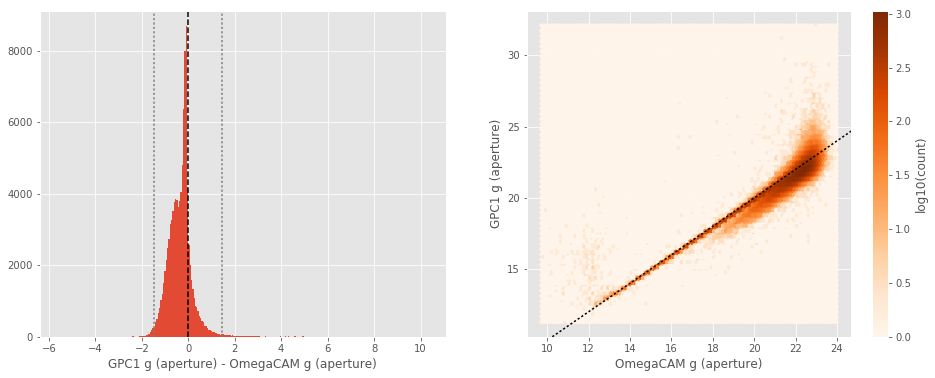

GPC1 g (total) - OmegaCAM g (total):
- Median: -0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -1.296688632965088
- 99% percentile: 0.7950097846984904


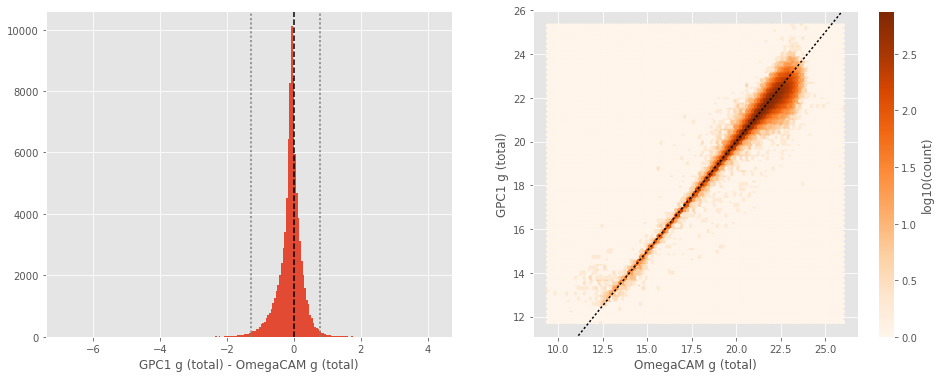

DECam g (aperture) - OmegaCAM g (aperture):
- Median: -0.86
- Median Absolute Deviation: 0.07
- 1% percentile: -1.1990659713745118
- 99% percentile: 4.204625453948987


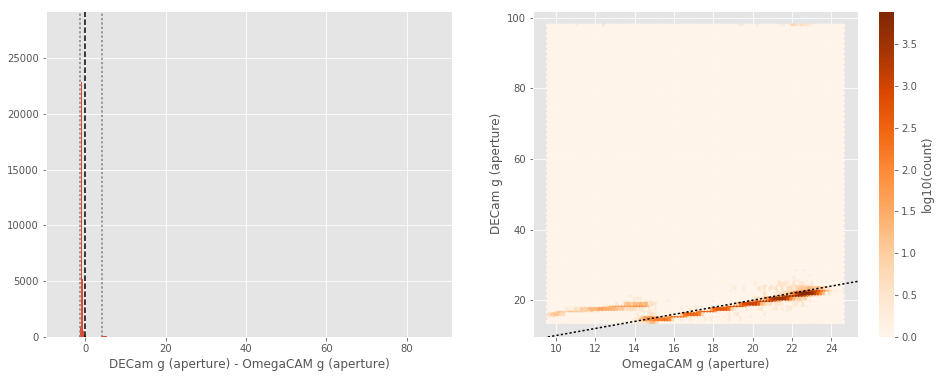

DECam g (total) - OmegaCAM g (total):
- Median: -0.10
- Median Absolute Deviation: 0.13
- 1% percentile: -1.087312183380127
- 99% percentile: 2.6726785278320295


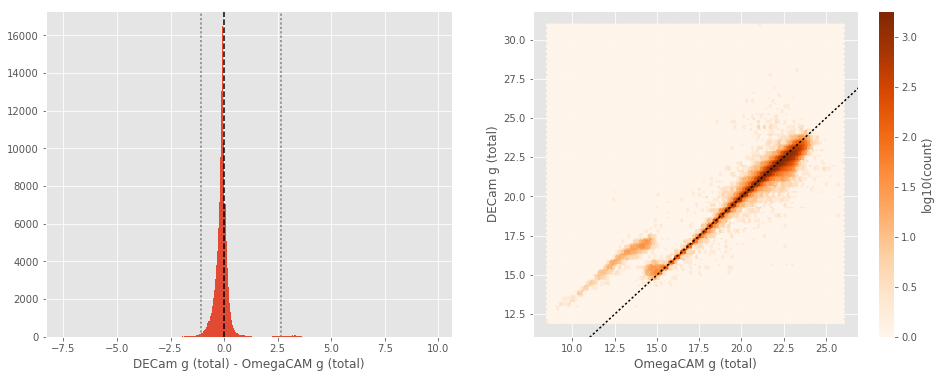

DECam g (aperture) - GPC1 g (aperture):
- Median: -0.50
- Median Absolute Deviation: 0.34
- 1% percentile: -2.962065200805664
- 99% percentile: 2.009983825683591


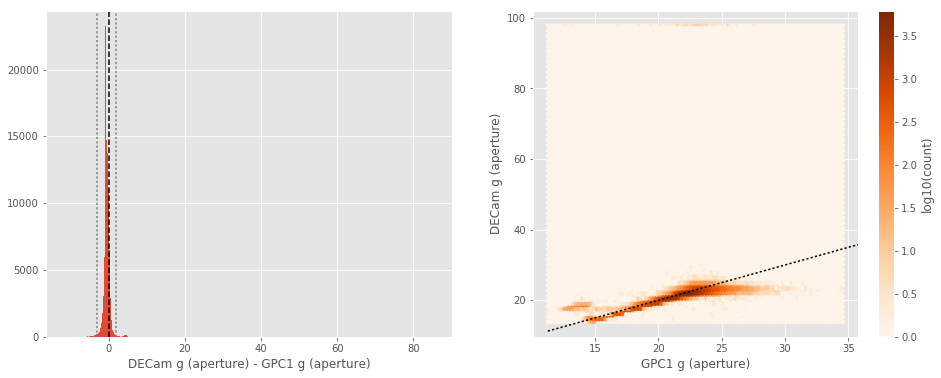

DECam g (total) - GPC1 g (total):
- Median: -0.00
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8025470733642578
- 99% percentile: 2.3840057277679465


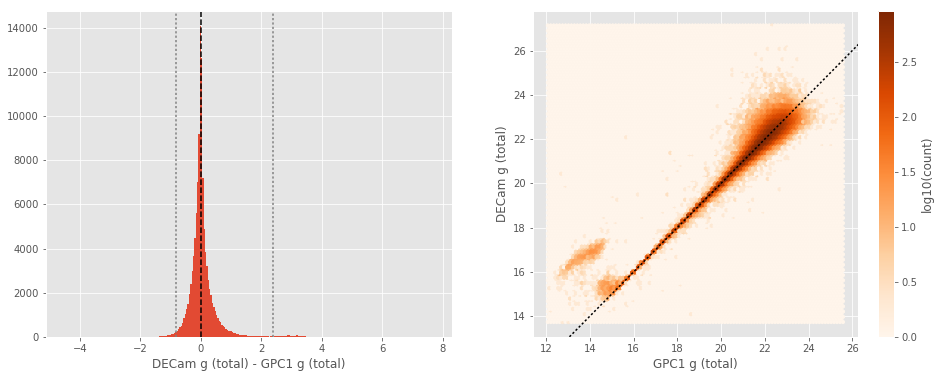

WFI r (aperture) - OmegaCAM r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.13
- 1% percentile: -0.3106356048583985
- 99% percentile: 0.7375316619873049


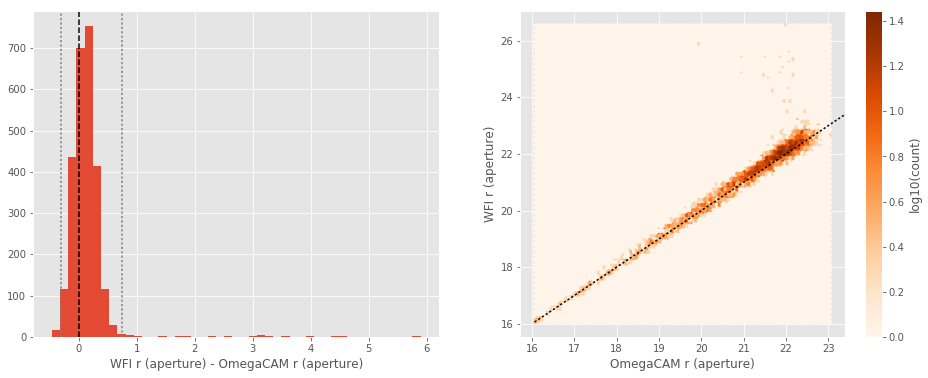

WFI r (total) - OmegaCAM r (total):
- Median: -0.25
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2209947586059569
- 99% percentile: 0.9199421310424809


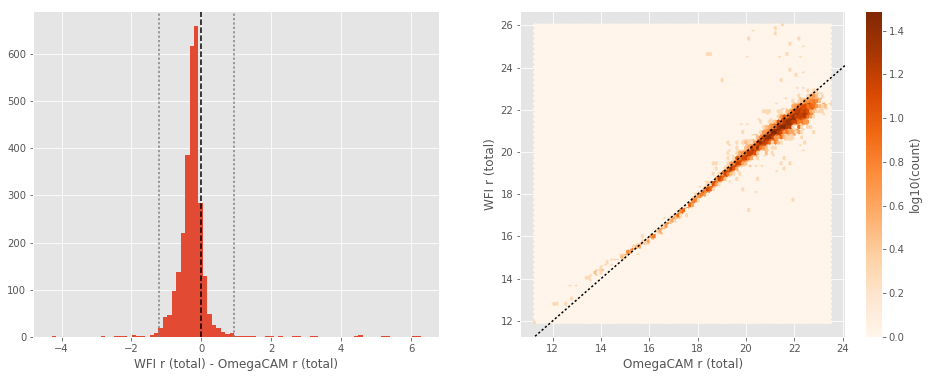

GPC1 r (aperture) - OmegaCAM r (aperture):
- Median: -0.16
- Median Absolute Deviation: 0.22
- 1% percentile: -1.072125778198242
- 99% percentile: 1.2293571472167972


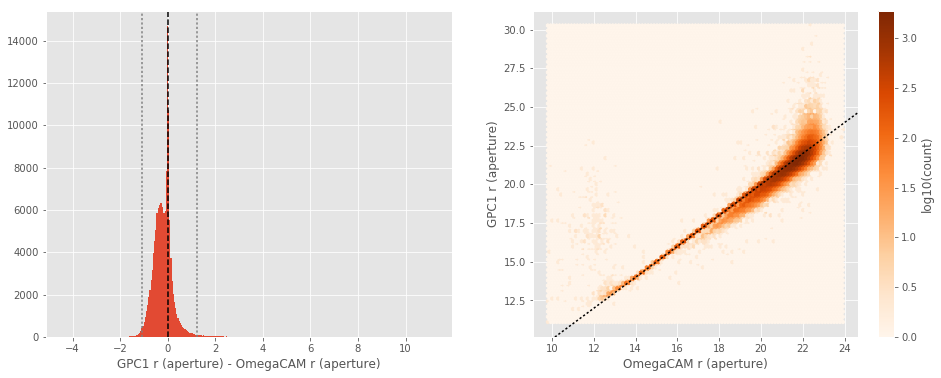

GPC1 r (total) - OmegaCAM r (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.922282371520996
- 99% percentile: 1.0283002471923828


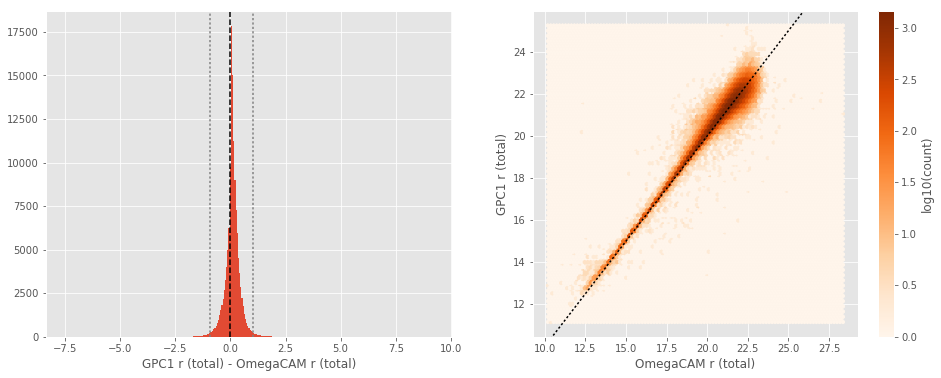

DECam r (aperture) - OmegaCAM r (aperture):
- Median: -0.79
- Median Absolute Deviation: 0.07
- 1% percentile: -1.1389399719238282
- 99% percentile: 4.62564792633057


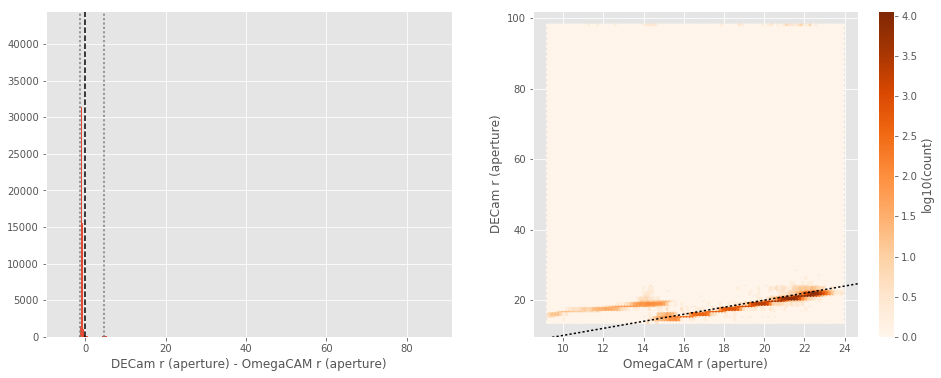

DECam r (total) - OmegaCAM r (total):
- Median: -0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0039896392822265
- 99% percentile: 2.9235151672363267


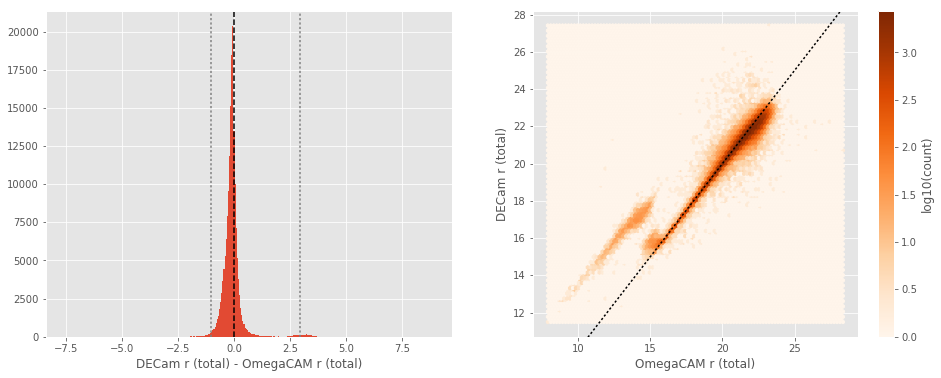

GPC1 r (aperture) - WFI r (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.34
- 1% percentile: -1.379720687866211
- 99% percentile: 1.7204780578613306


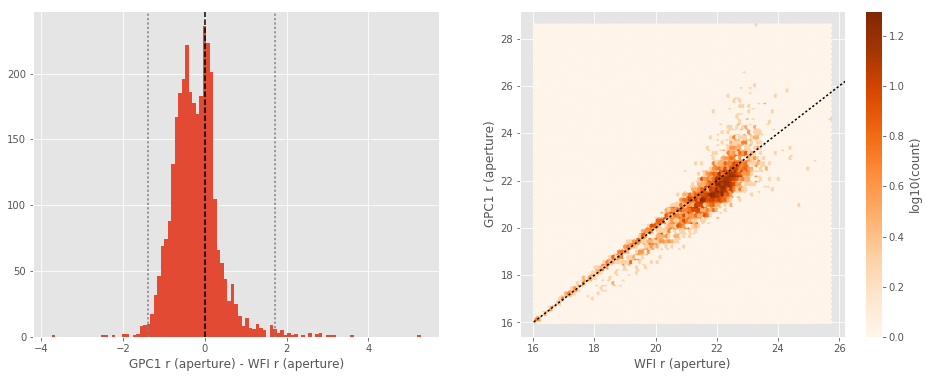

GPC1 r (total) - WFI r (total):
- Median: 0.34
- Median Absolute Deviation: 0.14
- 1% percentile: -0.486072883605957
- 99% percentile: 1.257844467163085


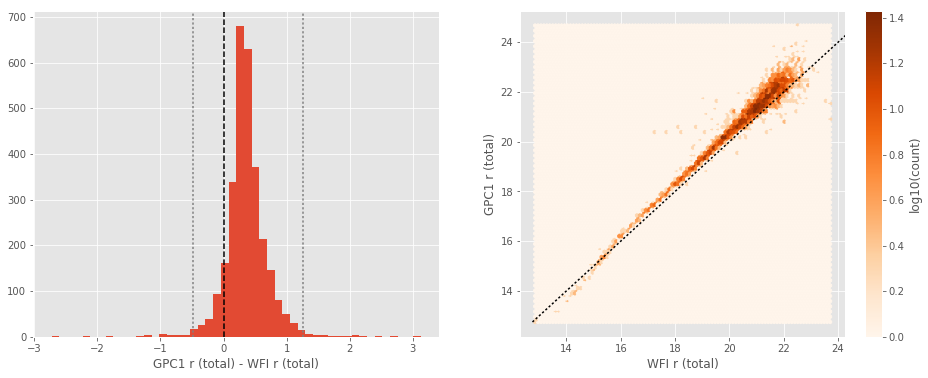

DECam r (aperture) - WFI r (aperture):
- Median: -0.84
- Median Absolute Deviation: 0.10
- 1% percentile: -1.2890096092224121
- 99% percentile: -0.22158359527587562


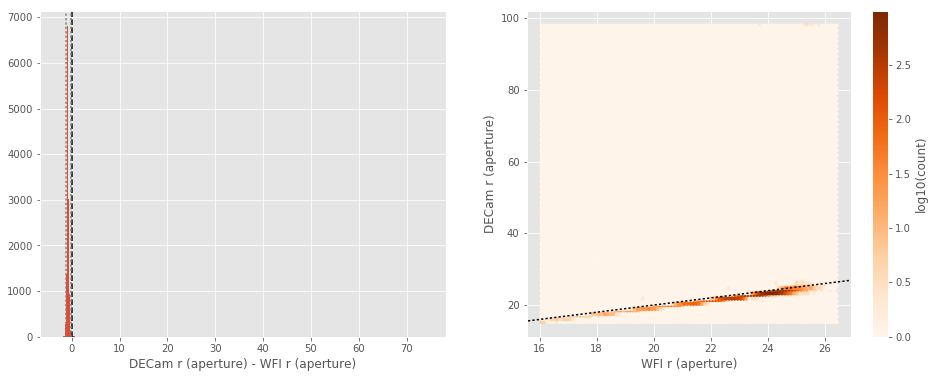

DECam r (total) - WFI r (total):
- Median: 0.20
- Median Absolute Deviation: 0.13
- 1% percentile: -0.5266014671325684
- 99% percentile: 1.3607005310058575


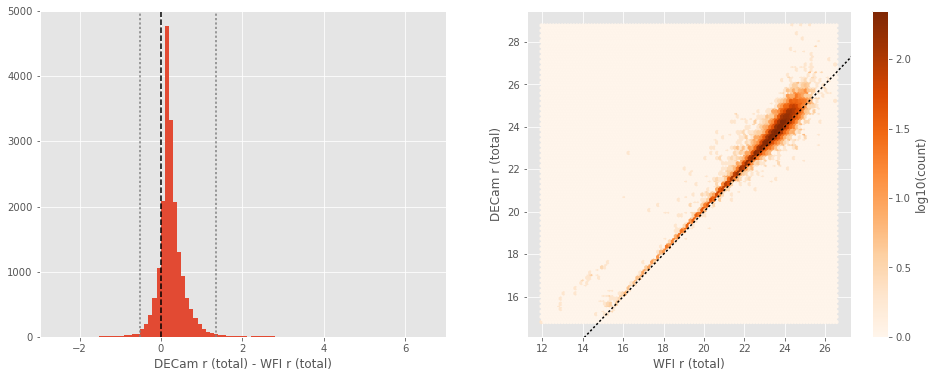

DECam r (aperture) - GPC1 r (aperture):
- Median: -0.61
- Median Absolute Deviation: 0.26
- 1% percentile: -2.3846909523010256
- 99% percentile: 4.328889093399047


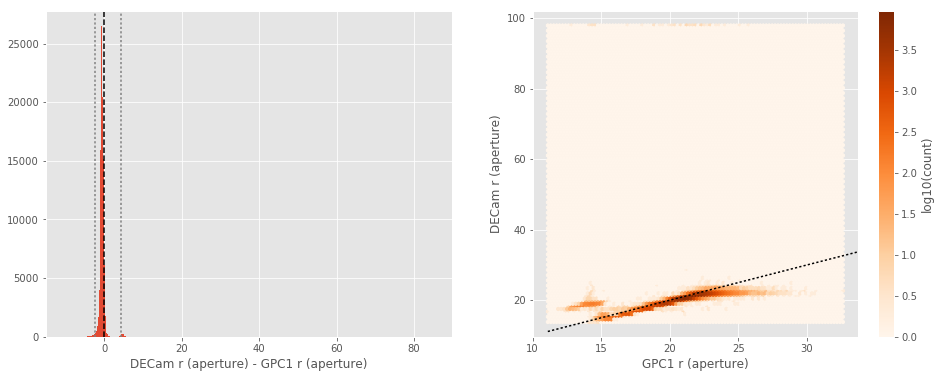

DECam r (total) - GPC1 r (total):
- Median: -0.18
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9400785064697266
- 99% percentile: 2.704162712097168


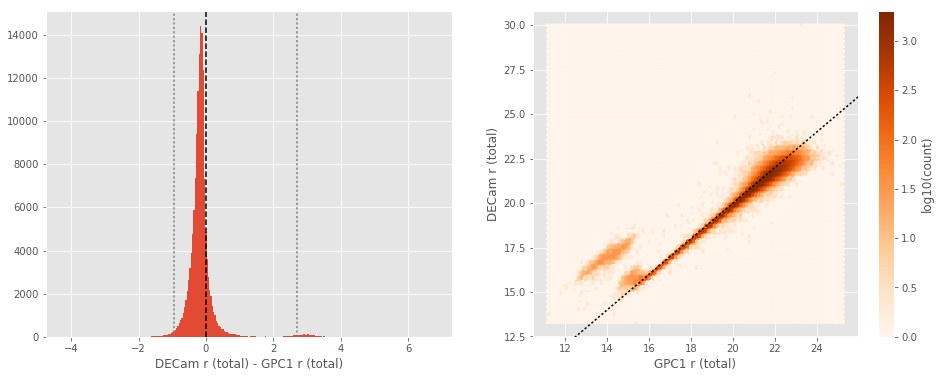

WFI i (aperture) - OmegaCAM i (aperture):
- Median: -0.00
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7342316436767578
- 99% percentile: 0.5792187499999985


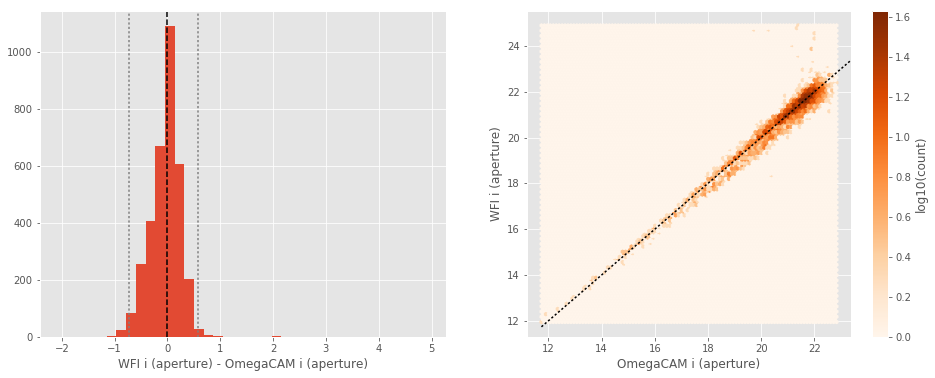

No sources have both OmegaCAM i (total) and WFI i (total) values.
GPC1 i (aperture) - OmegaCAM i (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9848984146118165
- 99% percentile: 0.6653031349182128


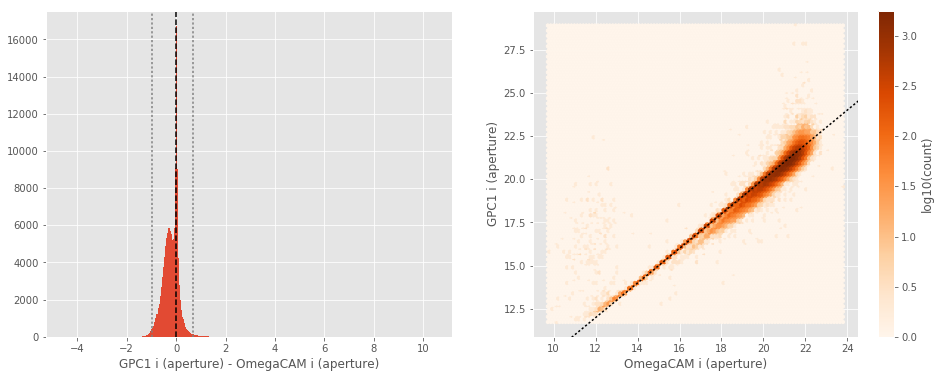

GPC1 i (total) - OmegaCAM i (total):
- Median: 0.05
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8688420867919922
- 99% percentile: 0.8083547973632813


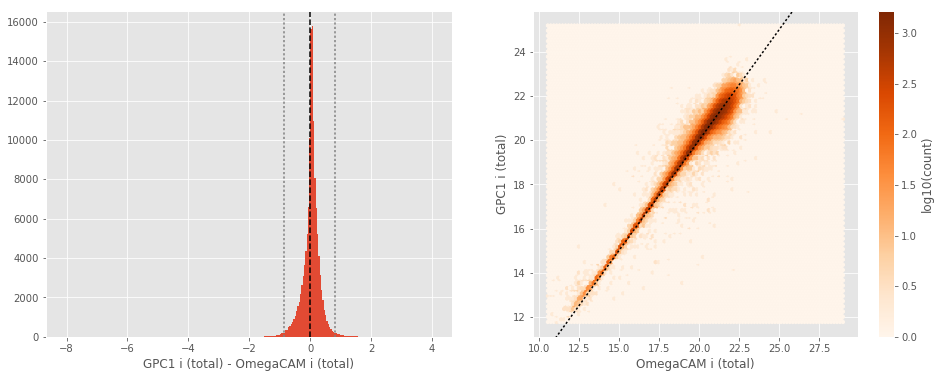

DECam i (aperture) - OmegaCAM i (aperture):
- Median: -0.70
- Median Absolute Deviation: 0.09
- 1% percentile: -1.0822570419311524
- 99% percentile: 5.428895111083982


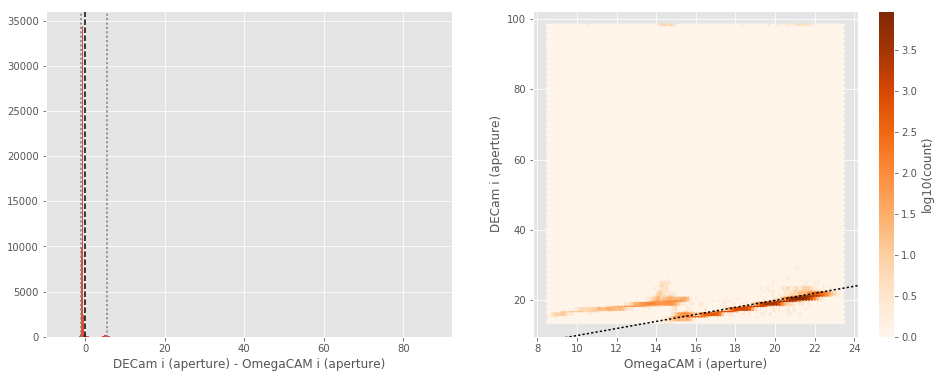

DECam i (total) - OmegaCAM i (total):
- Median: -0.13
- Median Absolute Deviation: 0.14
- 1% percentile: -1.020422763824463
- 99% percentile: 3.4286825561523466


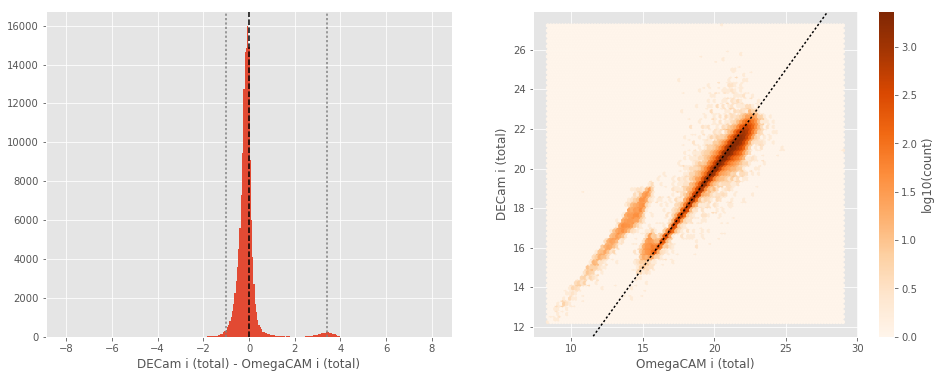

GPC1 i (aperture) - WFI i (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.32
- 1% percentile: -1.2702113151550294
- 99% percentile: 1.1307513236999518


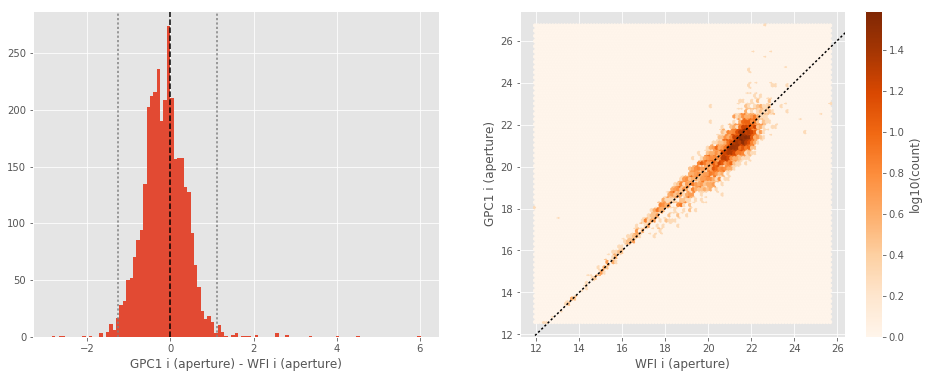

No sources have both WFI i (total) and GPC1 i (total) values.
DECam i (aperture) - WFI i (aperture):
- Median: -0.64
- Median Absolute Deviation: 0.19
- 1% percentile: -1.623051071166992
- 99% percentile: 0.4383729934692382


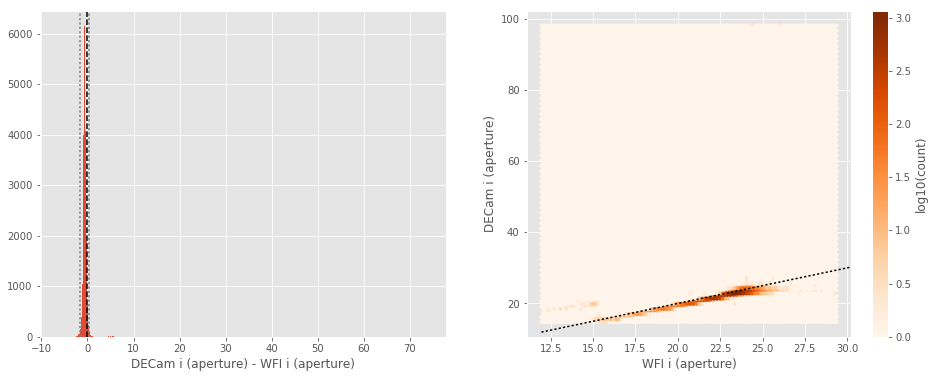

No sources have both WFI i (total) and DECam i (total) values.
DECam i (aperture) - GPC1 i (aperture):
- Median: -0.51
- Median Absolute Deviation: 0.24
- 1% percentile: -1.5011099433898927
- 99% percentile: 5.05627010345459


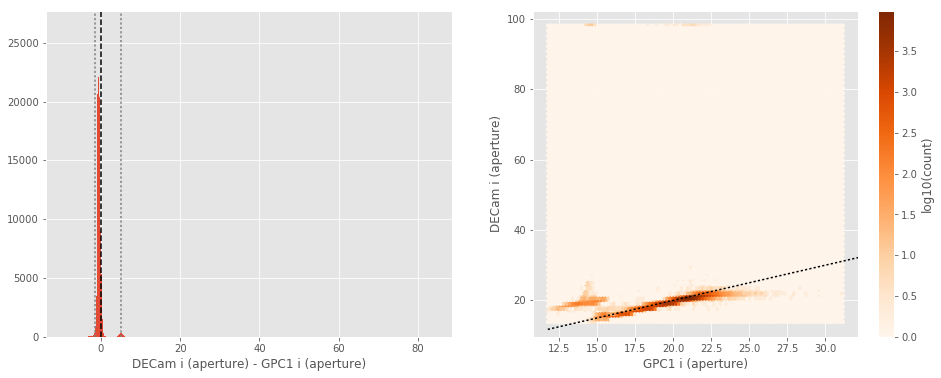

DECam i (total) - GPC1 i (total):
- Median: -0.17
- Median Absolute Deviation: 0.10
- 1% percentile: -0.7834041595458985
- 99% percentile: 3.1839383888244632


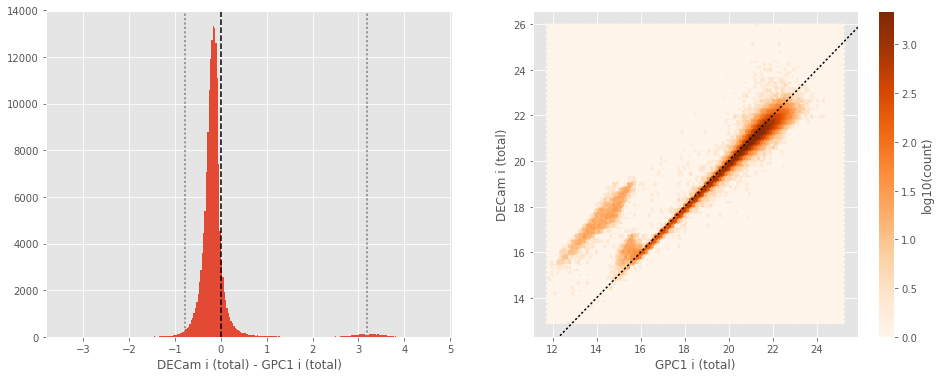

GPC1 z (aperture) - OmegaCAM z (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -0.806519775390625
- 99% percentile: 0.6441340255737295


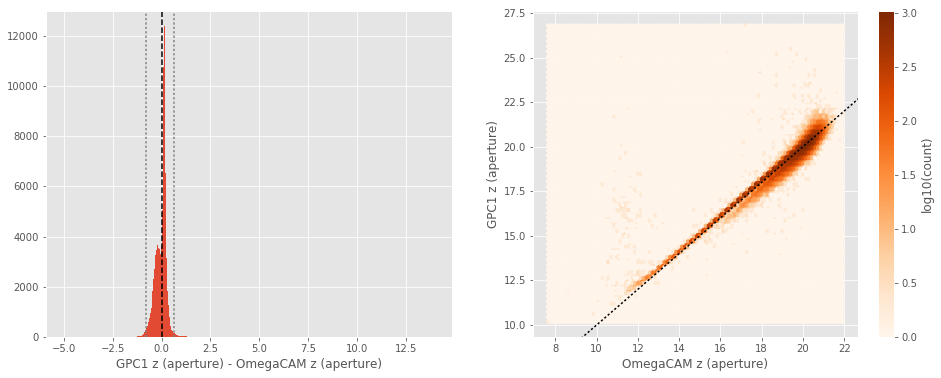

GPC1 z (total) - OmegaCAM z (total):
- Median: 0.17
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6282771301269532
- 99% percentile: 0.7950209236145019


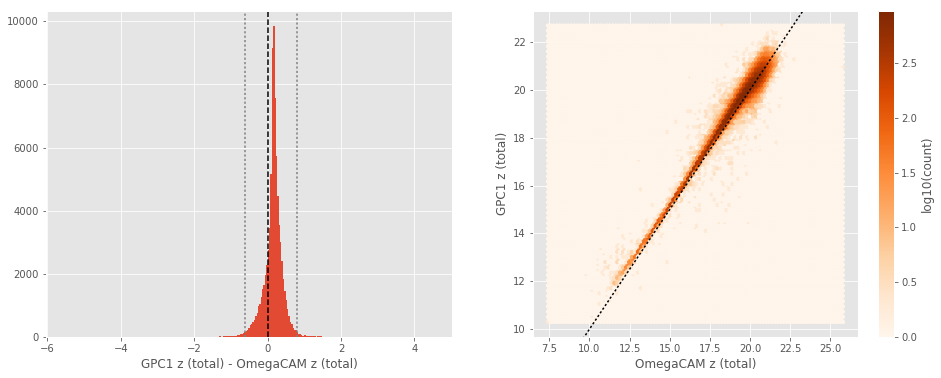

DECam z (aperture) - OmegaCAM z (aperture):
- Median: -0.54
- Median Absolute Deviation: 0.07
- 1% percentile: -0.8661718368530273
- 99% percentile: 5.566607856750493


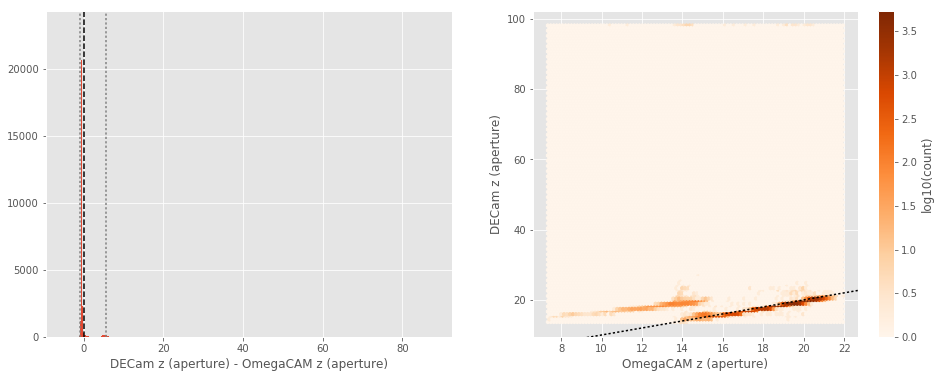

DECam z (total) - OmegaCAM z (total):
- Median: 0.01
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8286170196533202
- 99% percentile: 3.3931300640106197


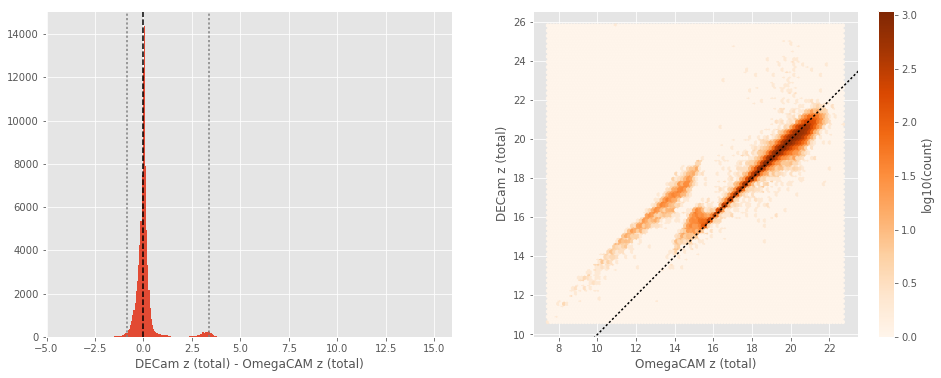

VISTA z (aperture) - OmegaCAM z (aperture):
- Median: 0.16
- Median Absolute Deviation: 0.09
- 1% percentile: -0.33622013092041014
- 99% percentile: 0.8982582283020007


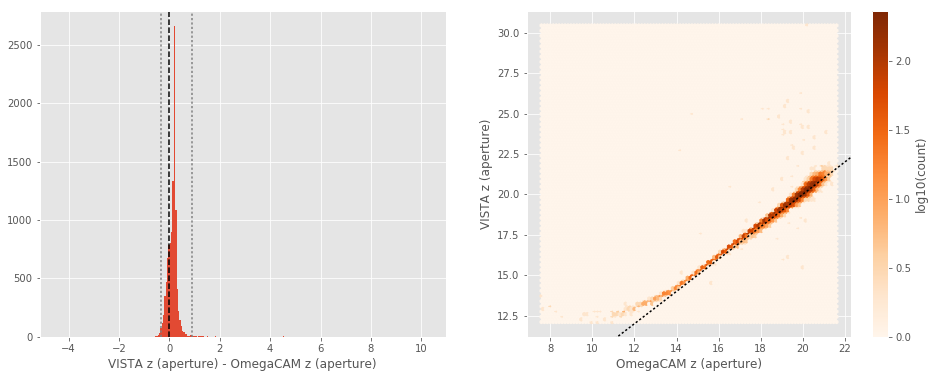

VISTA z (total) - OmegaCAM z (total):
- Median: 0.05
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8182351684570313
- 99% percentile: 0.7913664817810039


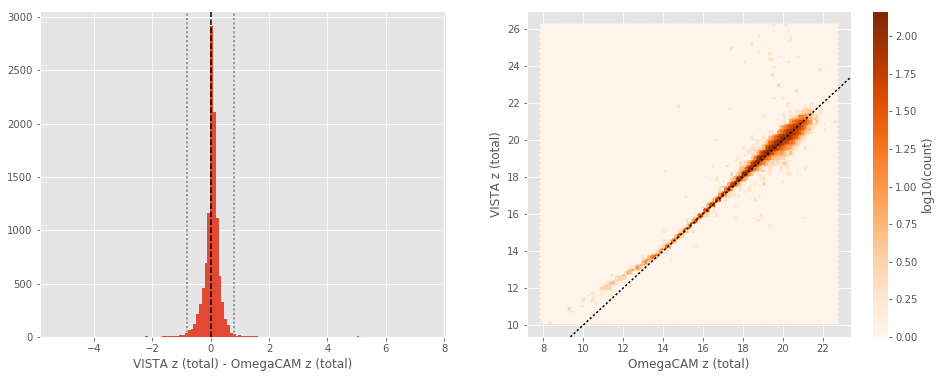

DECam z (aperture) - GPC1 z (aperture):
- Median: -0.47
- Median Absolute Deviation: 0.22
- 1% percentile: -1.5124702644348145
- 99% percentile: 4.874284849166879


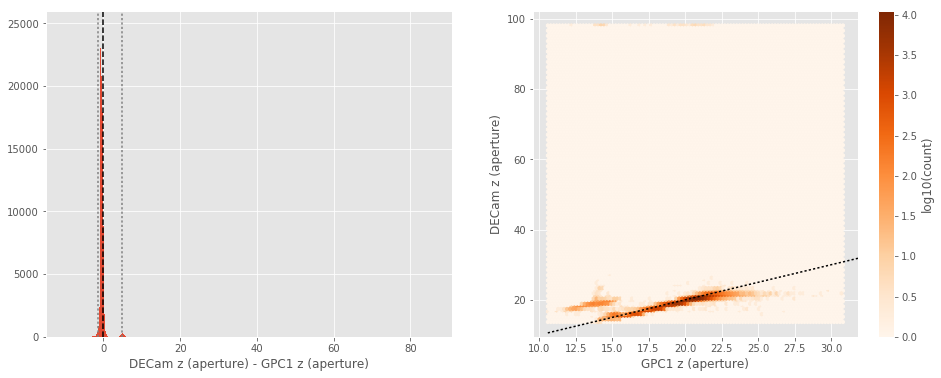

DECam z (total) - GPC1 z (total):
- Median: -0.18
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8591748046875
- 99% percentile: 2.946851081848142


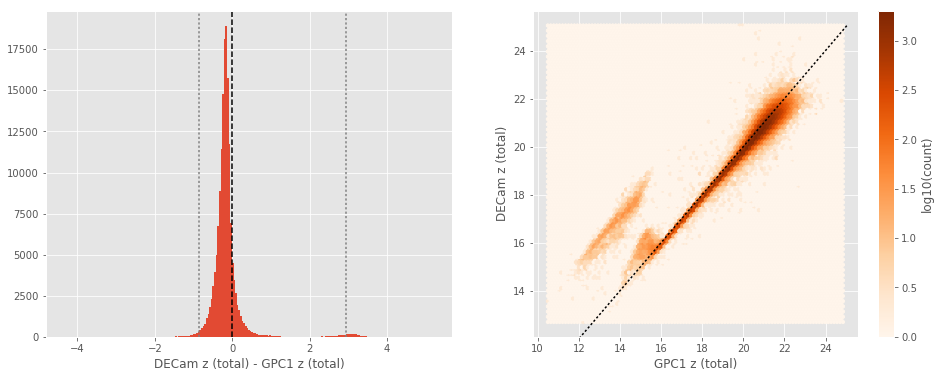

VISTA z (aperture) - GPC1 z (aperture):
- Median: 0.12
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8292744445800782
- 99% percentile: 0.7439142608642577


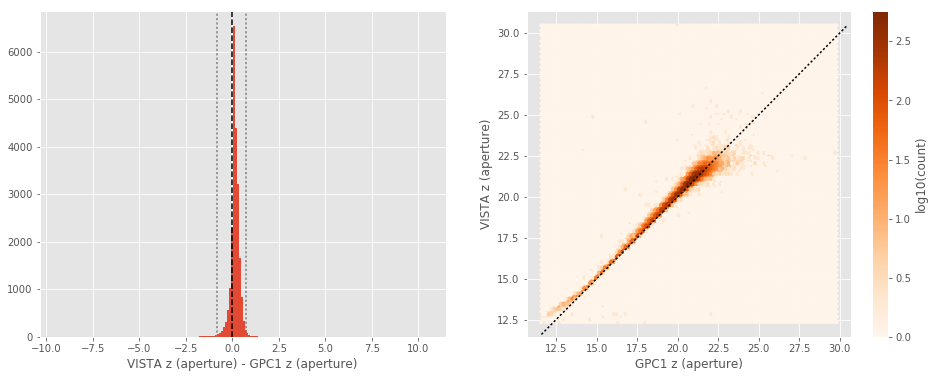

VISTA z (total) - GPC1 z (total):
- Median: -0.13
- Median Absolute Deviation: 0.10
- 1% percentile: -0.7600824356079102
- 99% percentile: 0.5232796287536614


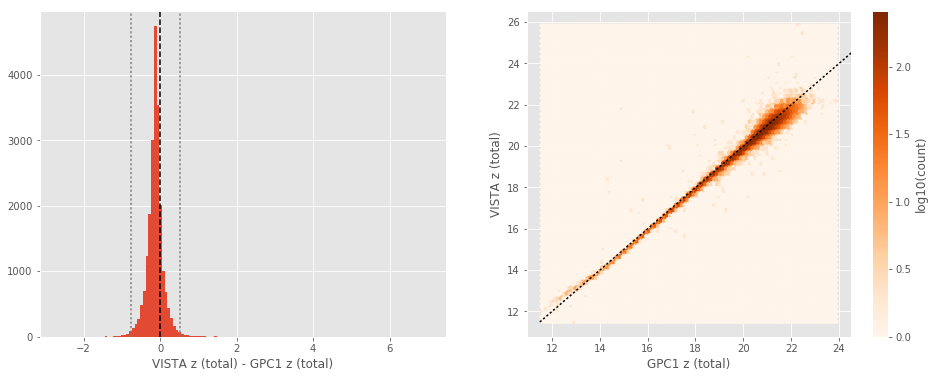

VISTA z (aperture) - DECam z (aperture):
- Median: 0.63
- Median Absolute Deviation: 0.16
- 1% percentile: -1.0520355224609375
- 99% percentile: 1.5007448577880806


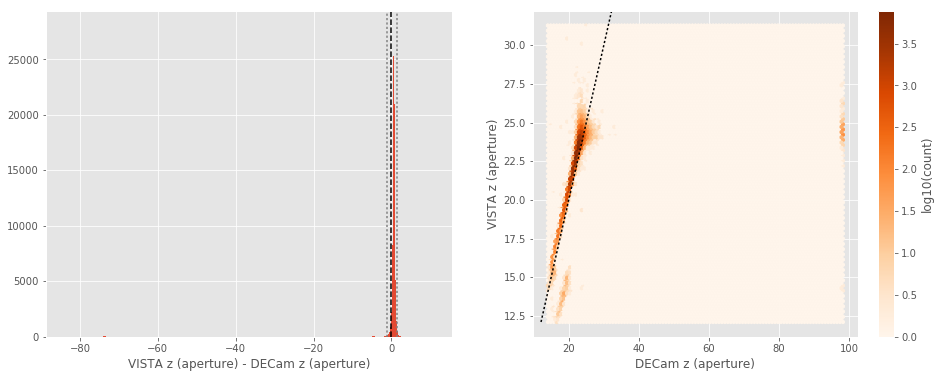

VISTA z (total) - DECam z (total):
- Median: 0.07
- Median Absolute Deviation: 0.19
- 1% percentile: -2.0058786392211916
- 99% percentile: 1.170486259460449


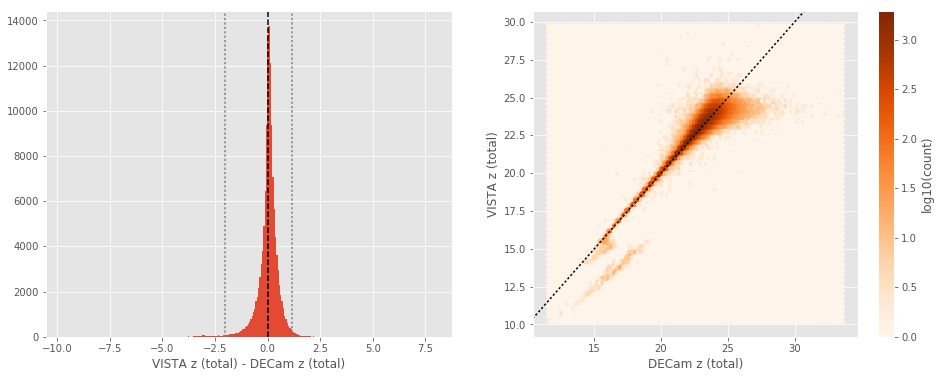

DECam y (aperture) - GPC1 y (aperture):
- Median: -0.50
- Median Absolute Deviation: 0.24
- 1% percentile: -2.5951641464233397
- 99% percentile: 0.7417213249206779


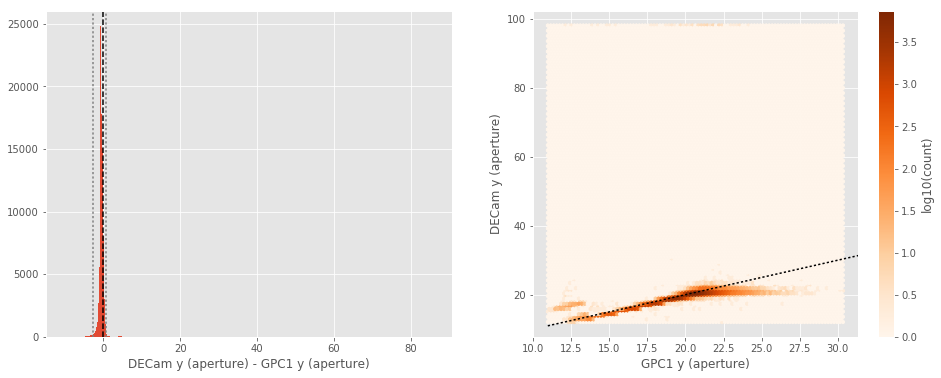

DECam y (total) - GPC1 y (total):
- Median: -0.12
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0285805511474608
- 99% percentile: 0.9867723846435557


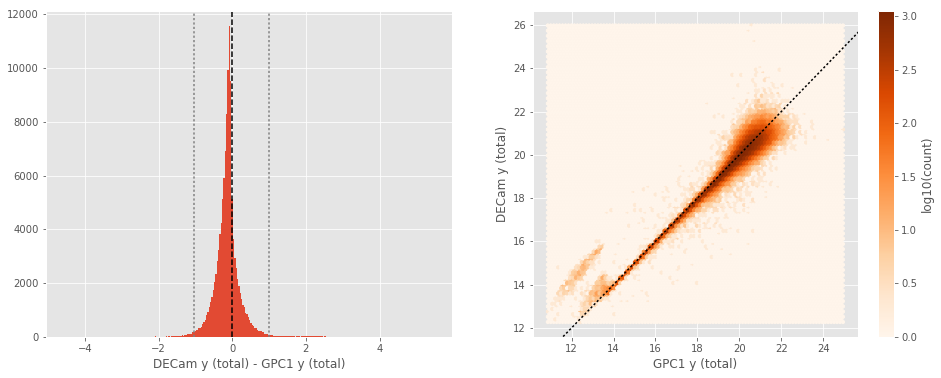

VISTA y (aperture) - GPC1 y (aperture):
- Median: 0.09
- Median Absolute Deviation: 0.16
- 1% percentile: -1.9527296447753906
- 99% percentile: 1.0630077362060548


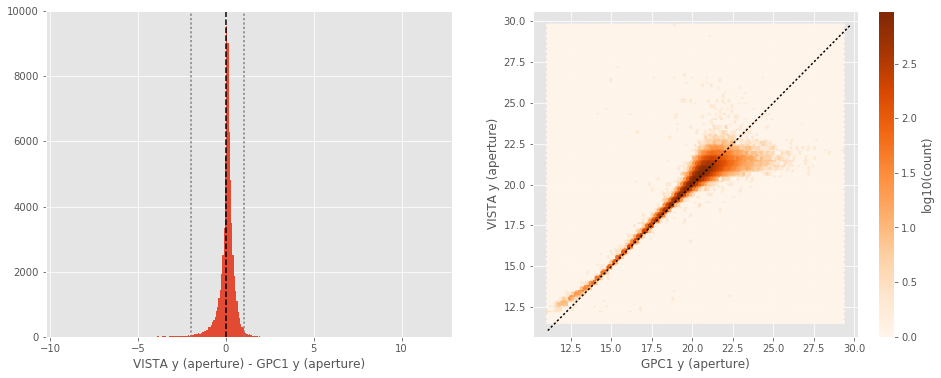

VISTA y (total) - GPC1 y (total):
- Median: -0.19
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0352452850341796
- 99% percentile: 0.7106719207763674


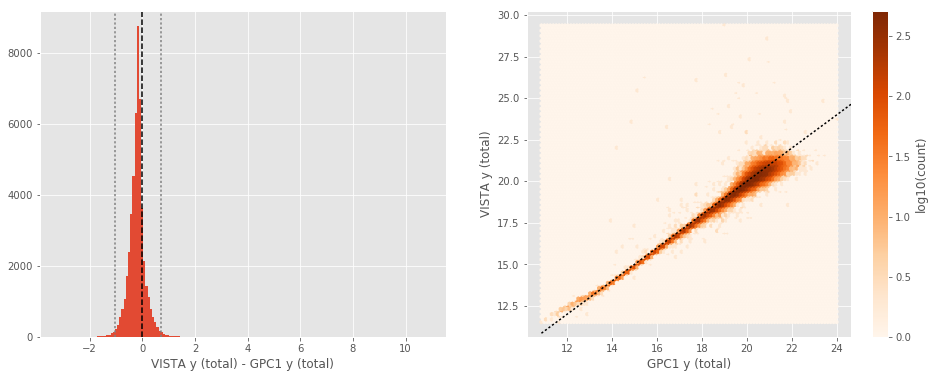

VISTA y (aperture) - DECam y (aperture):
- Median: 0.55
- Median Absolute Deviation: 0.34
- 1% percentile: -74.98888462066651
- 99% percentile: 2.082161674499512


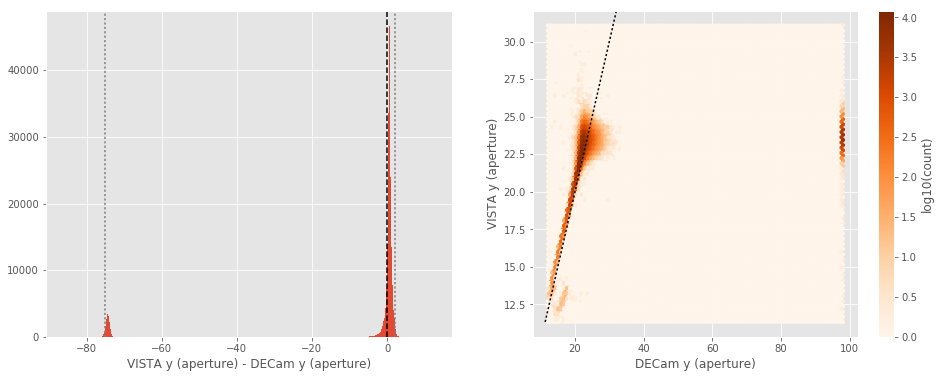

VISTA y (total) - DECam y (total):
- Median: -0.04
- Median Absolute Deviation: 0.38
- 1% percentile: -3.277728614807129
- 99% percentile: 1.957741127014161


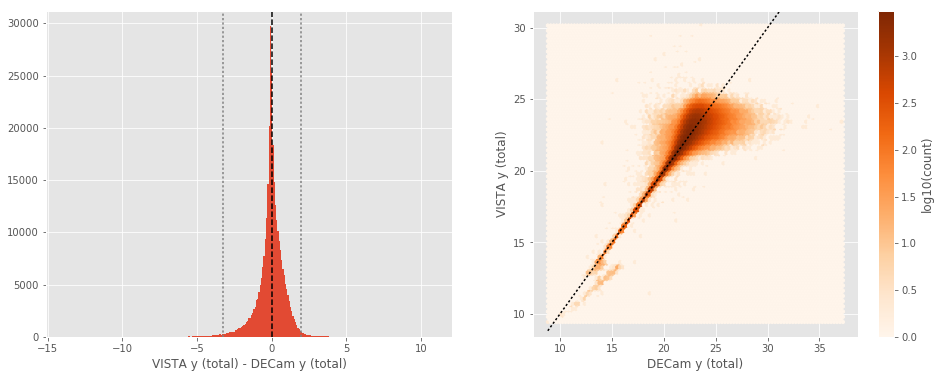

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to 2MASS to compare magnitudes.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In [12]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [13]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_CDFS-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

VISTA J (total) - 2MASS J:
- Median: 0.03
- Median Absolute Deviation: 0.06
- 1% percentile: -1.2033101961423698
- 99% percentile: 1.0771015779970339


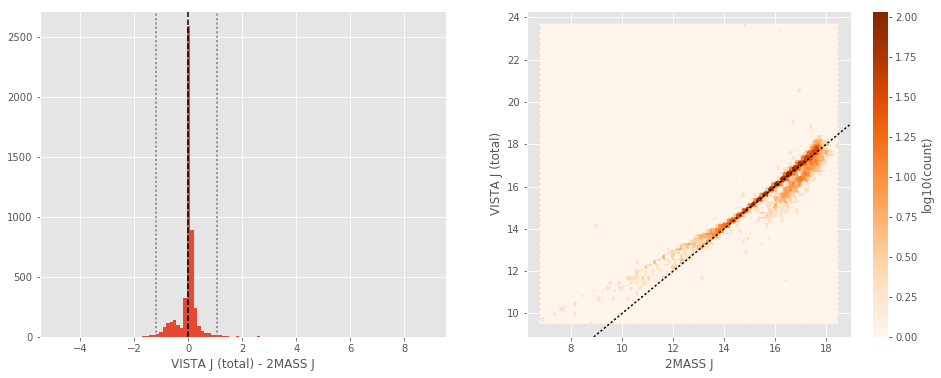

In [14]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks (total) - 2MASS Ks:
- Median: 0.03
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1203042906816978
- 99% percentile: 1.2803789119092368


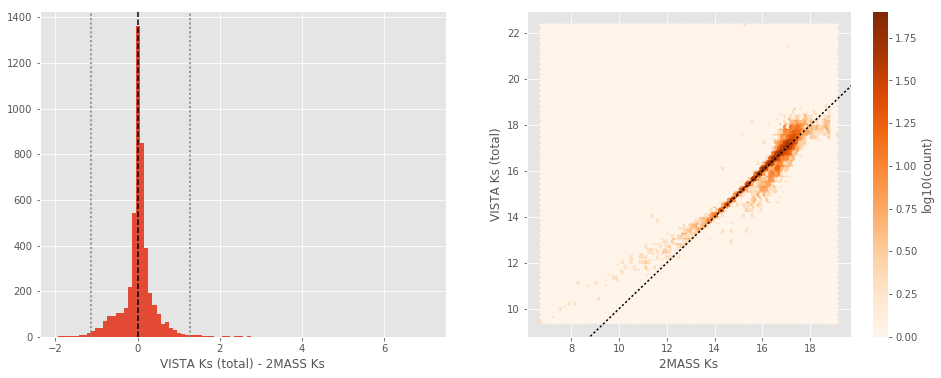

In [15]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_vista_ks'][ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 148283 / 2168544 (6.84%)


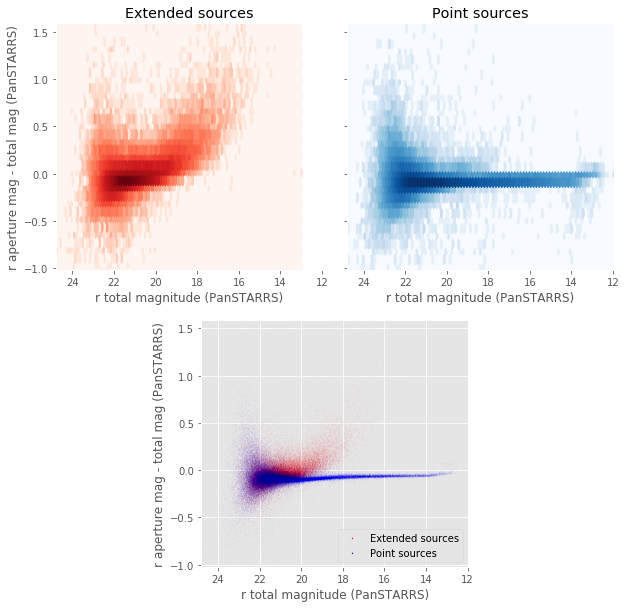

In [16]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (PanSTARRS)", "r aperture mag - total mag (PanSTARRS)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 63057 / 2168544 (2.91%)


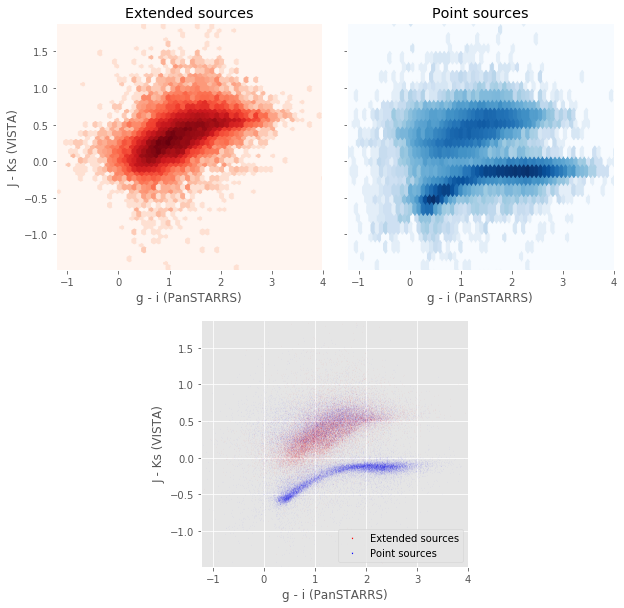

In [17]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_ks'],
    "g - i (PanSTARRS)", "J - Ks (VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 64716 / 2168544 (2.98%)


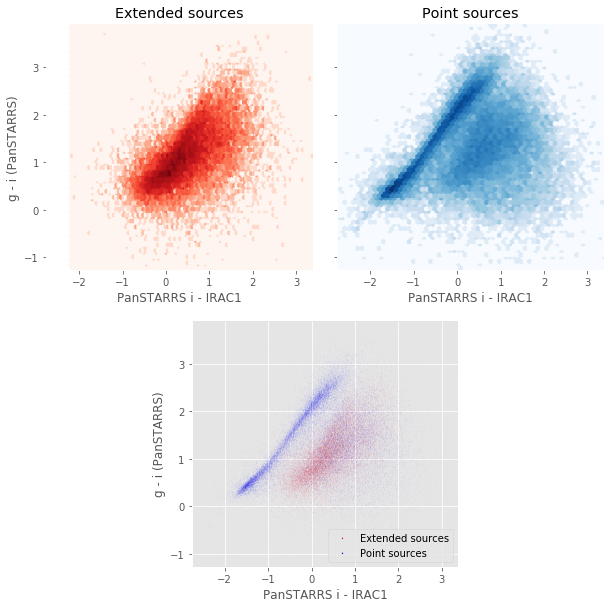

In [18]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    "PanSTARRS i - IRAC1", "g - i (PanSTARRS)",
    master_catalogue["stellarity"]
)

Number of source used: 18258 / 2168544 (0.84%)


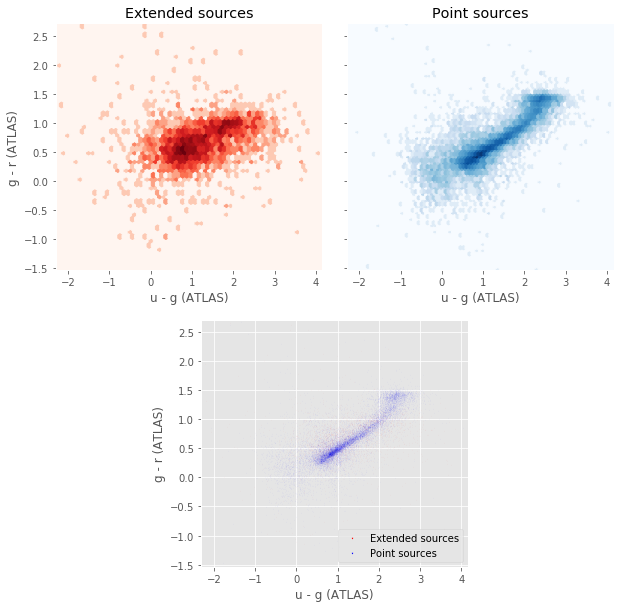

In [19]:
nb_ccplots(
    master_catalogue['m_omegacam_u'] - master_catalogue['m_omegacam_g'],
    master_catalogue['m_omegacam_g'] - master_catalogue['m_omegacam_r'],
    "u - g (ATLAS)", "g - r (ATLAS)",
    master_catalogue["stellarity"]
)

Number of source used: 826224 / 2168544 (38.10%)


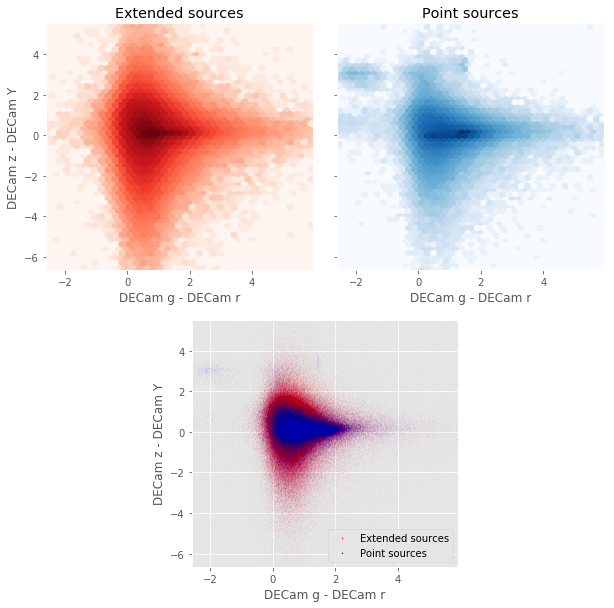

In [20]:
nb_ccplots(
    master_catalogue['m_decam_g'] - master_catalogue['m_decam_r'],
    master_catalogue['m_decam_z'] - master_catalogue['m_decam_y'],
    "DECam g - DECam r", "DECam z - DECam Y",
    master_catalogue["stellarity"]
)

Number of source used: 64049 / 2168544 (2.95%)


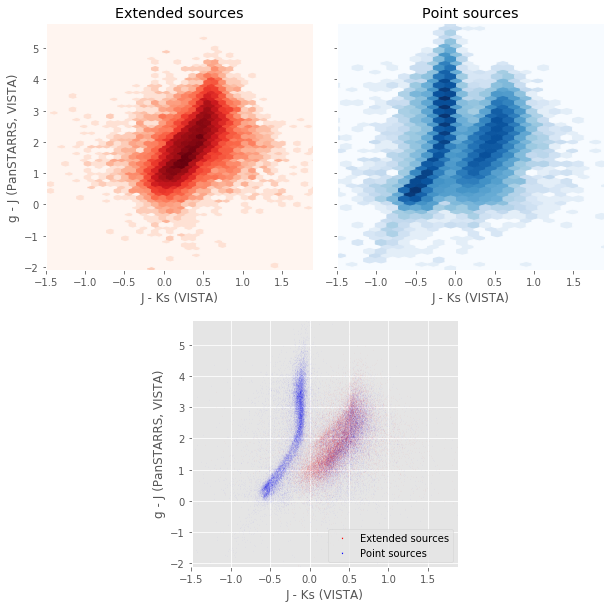

In [21]:
nb_ccplots(
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_ks'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_vista_j'],
    "J - Ks (VISTA)", "g - J (PanSTARRS, VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 101174 / 2168544 (4.67%)


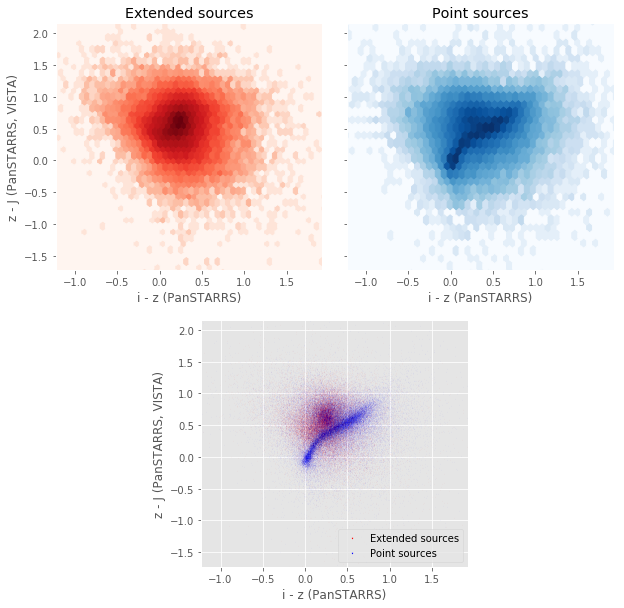

In [22]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_gpc1_z'] - master_catalogue['m_vista_j'],
    "i - z (PanSTARRS)", "z - J (PanSTARRS, VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 16078 / 2168544 (0.74%)


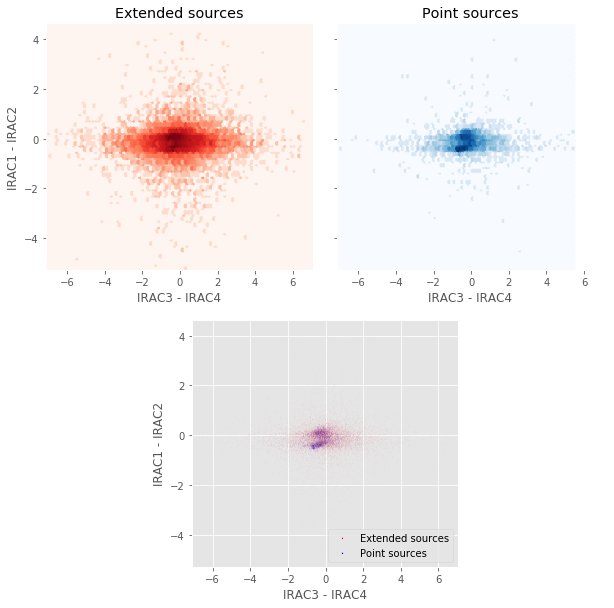

In [23]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)